In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import calendar
import matplotlib.ticker as ticker

In [ ]:
df = pd.read_csv('/airlines.csv')


In [ ]:
conn = sqlite3.connect('airlines.db')


In [ ]:
df.to_sql('airlines', conn, if_exists='replace', index=False)


14

In [ ]:
print(df)


   IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America


In [ ]:
df2 = pd.read_csv('/airports.csv')

df3 = pd.read_csv('/cancellation_codes.csv')



In [ ]:
# Define the chunk size
chunksize = 1000000

dtypes = {'ORIGIN_AIRPORT': str, 'DESTINATION_AIRPORT': str}
df_list = []
for chunk in pd.read_csv('/flights.csv', chunksize=chunksize, dtype=dtypes, low_memory=False):
    df_list.append(chunk)
df4 = pd.concat(df_list)

In [ ]:
print(df4.shape)


(5819079, 31)


In [ ]:
df.describe()
df2.describe()
df3.describe()
df4.describe().apply(lambda x: x.apply(lambda y: '{:.0f}'.format(y) if isinstance(y, (int, float)) else y)).T


,count,mean,std,min,25%,50%,75%,max
YEAR,5819079,2015,0,2015,2015,2015,2015,2015
MONTH,5819079,7,3,1,4,7,9,12
DAY,5819079,16,9,1,8,16,23,31
DAY_OF_WEEK,5819079,4,2,1,2,4,6,7
FLIGHT_NUMBER,5819079,2173,1757,1,730,1690,3230,9855
SCHEDULED_DEPARTURE,5819079,1330,484,1,917,1325,1730,2359
DEPARTURE_TIME,5732926,1335,496,1,921,1330,1740,2400
DEPARTURE_DELAY,5732926,9,37,-82,-5,-2,7,1988
TAXI_OUT,5730032,16,9,1,11,14,19,225
WHEELS_OFF,5730032,1357,498,1,935,1343,1754,2400


In [ ]:
# We need to check null values in dataset
df4.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

No of Total Flights - 5819079

No of cancelled flights - 89884

No of Null CANCELLATION_REASON = (5819079-89884) = 5729195

No of Delayed flights -  1063439

No of Null in Delay reason - (5,819,079-1063439) = 4755640

Other Nulls are also been caused by Either delay or cancellation, Also we won't be diving into those columns.

In [ ]:
# To check duplicated values 
print(df4.duplicated().value_counts()) 

False    5819079
dtype: int64


<ipython-input-37-de5c2203747f>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


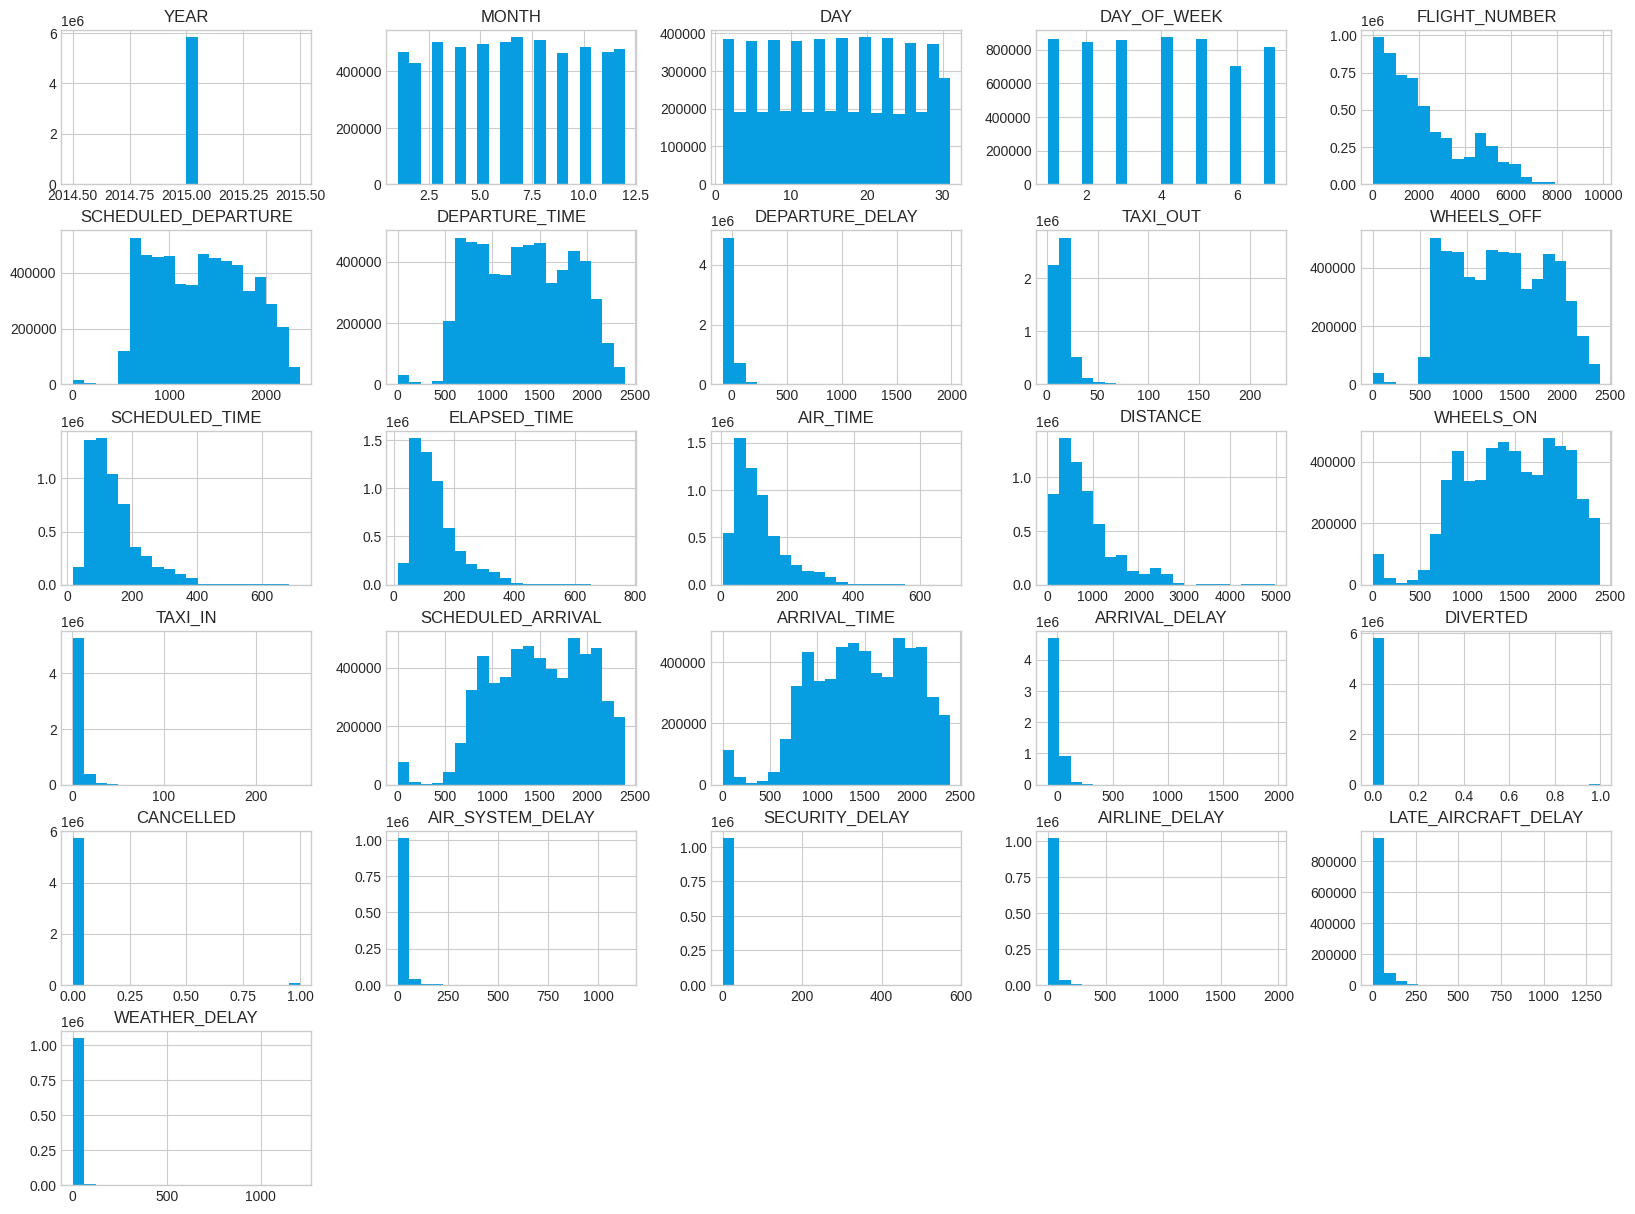

In [ ]:
plt.style.use('seaborn-whitegrid')

df4.hist(bins=20, figsize=(20,15), color='#069EE1')
plt.show();

In [ ]:
df2.to_sql('airports', conn, if_exists='replace', index=False)



322

In [ ]:
df3.to_sql('cancellation_codes', conn, if_exists='replace', index=False)

4

In [ ]:
df4.to_sql('flights', conn, if_exists='replace', index=False)

5819079

In [ ]:
df5 = pd.read_sql_query("SELECT * FROM airports", conn)


In [ ]:
print(df)

   IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America


In [ ]:

No_Of_Flights_by_each_Airline = pd.read_sql_query("SELECT COUNT(*),al.AIRLINE FROM flights f INNER JOIN airlines al ON f.AIRLINE = al.IATA_CODE GROUP BY f.AIRLINE", conn)

In [ ]:
print(No_Of_Flights_by_each_Airline)

    COUNT(*)                       AIRLINE
0     725984        American Airlines Inc.
1     172521          Alaska Airlines Inc.
2     267048               JetBlue Airways
3     875881          Delta Air Lines Inc.
4     571977   Atlantic Southeast Airlines
5      90836        Frontier Airlines Inc.
6      76272        Hawaiian Airlines Inc.
7     294632  American Eagle Airlines Inc.
8     117379              Spirit Air Lines
9     588353         Skywest Airlines Inc.
10    515723         United Air Lines Inc.
11    198715               US Airways Inc.
12     61903                Virgin America
13   1261855        Southwest Airlines Co.


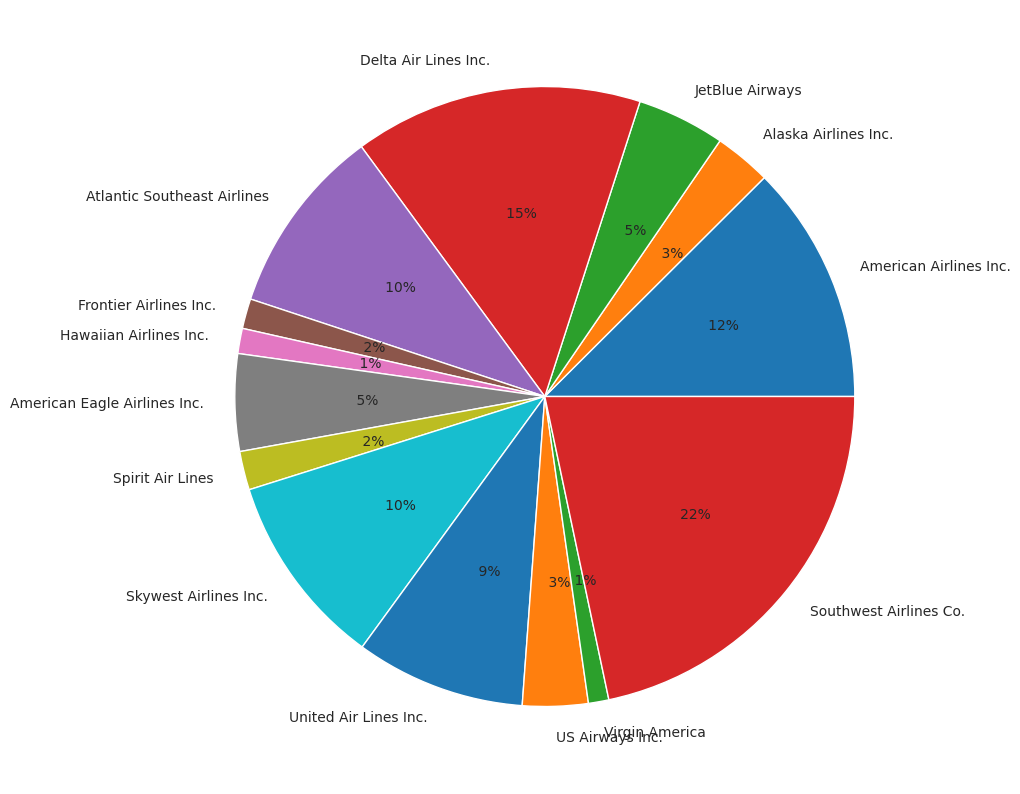

In [ ]:
axis = plt.subplots(figsize=(10,14))
Name = No_Of_Flights_by_each_Airline["AIRLINE"].unique()
size = No_Of_Flights_by_each_Airline["COUNT(*)"]
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

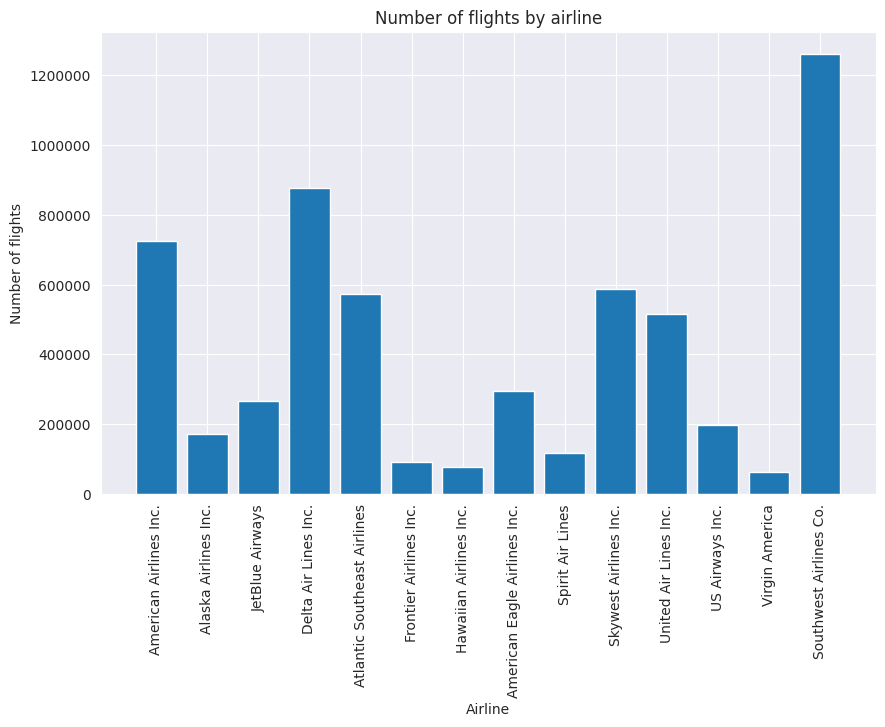

In [ ]:

airlines = No_Of_Flights_by_each_Airline['AIRLINE']
counts = No_Of_Flights_by_each_Airline['COUNT(*)']
# Create a bar chart of the flight counts
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(airlines, counts)
ax.set_xlabel('Airline')
ax.set_ylabel('Number of flights')
ax.set_title('Number of flights by airline')
plt.xticks(rotation=90)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
plt.show()


In [ ]:

No_Of_Flights_by_each_Month = pd.read_sql_query("SELECT COUNT(*),f.MONTH FROM flights f GROUP BY f.MONTH", conn)

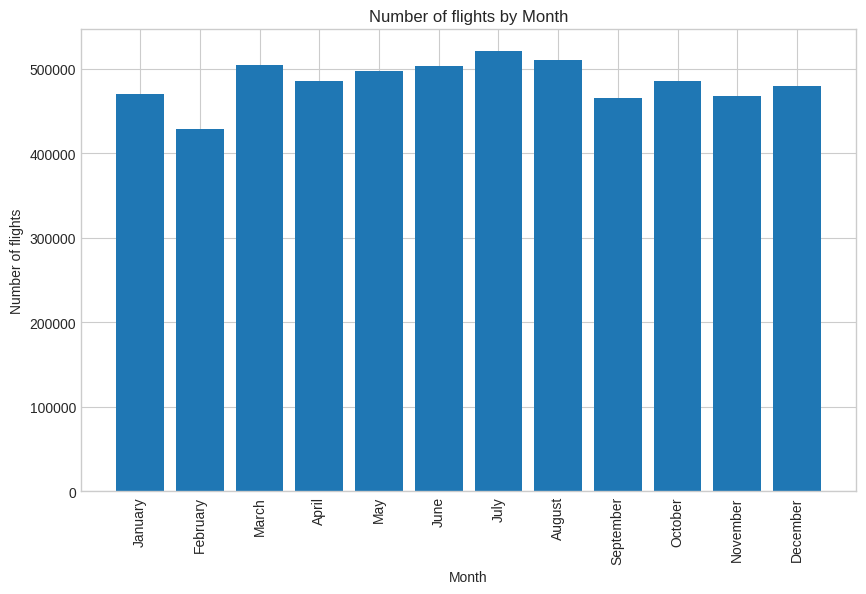

In [ ]:
month_names = {i+1: month for i, month in enumerate(calendar.month_name[1:])}
# Map the month numbers to month names in the 'MONTH' column of the DataFrame
No_Of_Flights_by_each_Month['MONTH'] = No_Of_Flights_by_each_Month['MONTH'].map(month_names)
airlines = No_Of_Flights_by_each_Month['MONTH']
counts = No_Of_Flights_by_each_Month['COUNT(*)']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(airlines, counts)
ax.set_xlabel('Month')
ax.set_ylabel('Number of flights')
ax.set_title('Number of flights by Month')
plt.xticks(rotation=90)
plt.show()

In [ ]:
No_Of_Flights_by_each_DAY_OF_Month = pd.read_sql_query("SELECT COUNT(*),f.DAY FROM flights f GROUP BY f.DAY", conn)

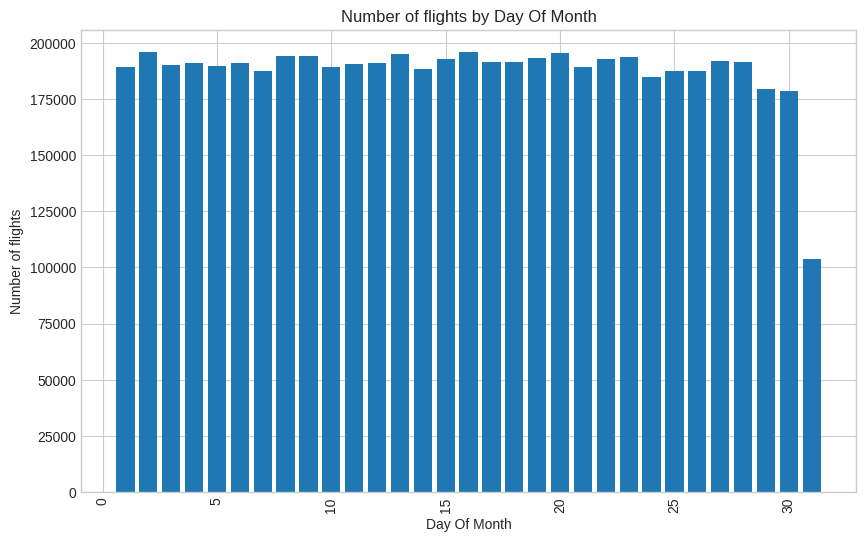

In [ ]:
# Extract the airline names and flight counts from the DataFrame
Day = No_Of_Flights_by_each_DAY_OF_Month['DAY']
counts = No_Of_Flights_by_each_DAY_OF_Month['COUNT(*)']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(Day, counts)
ax.set_xlabel('Day Of Month')
ax.set_ylabel('Number of flights')
ax.set_title('Number of flights by Day Of Month')
plt.xticks(rotation=90)
plt.show()

In [ ]:

No_Of_Flights_by_each_DAY_OF_WEEK = pd.read_sql_query("SELECT COUNT(*),f.DAY_OF_WEEK FROM flights f GROUP BY f.DAY_OF_WEEK", conn)

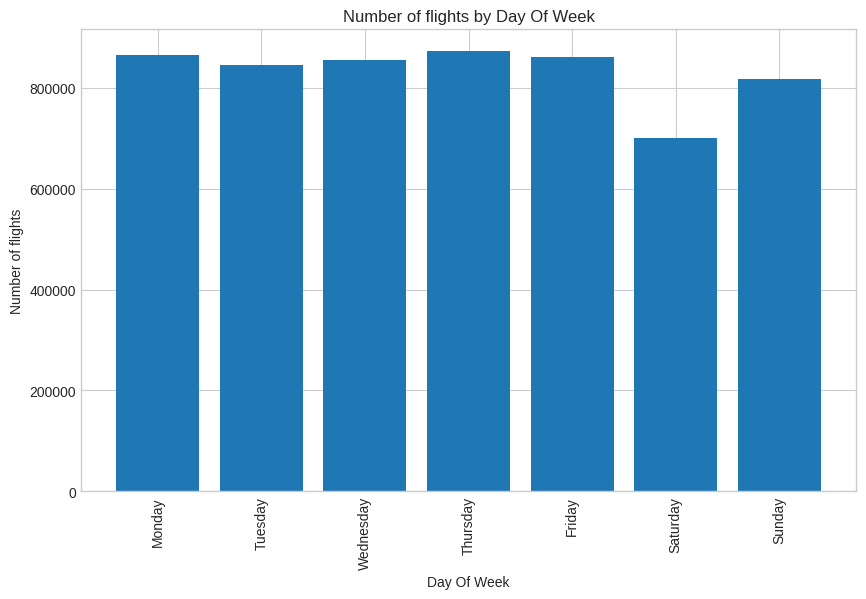

In [ ]:
# Define a dictionary with day numbers as keys and day names as values
day_names = {i+1: DAY for i, DAY in enumerate(calendar.day_name)}
No_Of_Flights_by_each_DAY_OF_WEEK['DAY_OF_WEEK'] = No_Of_Flights_by_each_DAY_OF_WEEK['DAY_OF_WEEK'].map(day_names)
Day = No_Of_Flights_by_each_DAY_OF_WEEK['DAY_OF_WEEK']
counts = No_Of_Flights_by_each_DAY_OF_WEEK['COUNT(*)']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(Day, counts)
ax.set_xlabel('Day Of Week')
ax.set_ylabel('Number of flights')
ax.set_title('Number of flights by Day Of Week')
plt.xticks(rotation=90)
plt.show()

In [ ]:
No_Of_Flights_Cancelled = pd.read_sql_query("SELECT COUNT(*) as cancelled_flights, al.AIRLINE, (COUNT(*) * 100.0) / (SELECT COUNT(*) FROM flights WHERE AIRLINE = f.AIRLINE) as cancelled_percentage, (SELECT COUNT(*) FROM flights WHERE AIRLINE = f.AIRLINE) as Total_Flights FROM flights f INNER JOIN airlines al ON f.AIRLINE = al.IATA_CODE WHERE CANCELLED = 1 GROUP BY f.AIRLINE, al.AIRLINE", conn)

In [ ]:
print(No_Of_Flights_Cancelled)

    cancelled_flights                       AIRLINE  cancelled_percentage  \
0               10919        American Airlines Inc.              1.504028   
1                 669          Alaska Airlines Inc.              0.387779   
2                4276               JetBlue Airways              1.601210   
3                3824          Delta Air Lines Inc.              0.436589   
4               15231   Atlantic Southeast Airlines              2.662869   
5                 588        Frontier Airlines Inc.              0.647320   
6                 171        Hawaiian Airlines Inc.              0.224198   
7               15025  American Eagle Airlines Inc.              5.099582   
8                2004              Spirit Air Lines              1.707290   
9                9960         Skywest Airlines Inc.              1.692861   
10               6573         United Air Lines Inc.              1.274521   
11               4067               US Airways Inc.              2.046650   

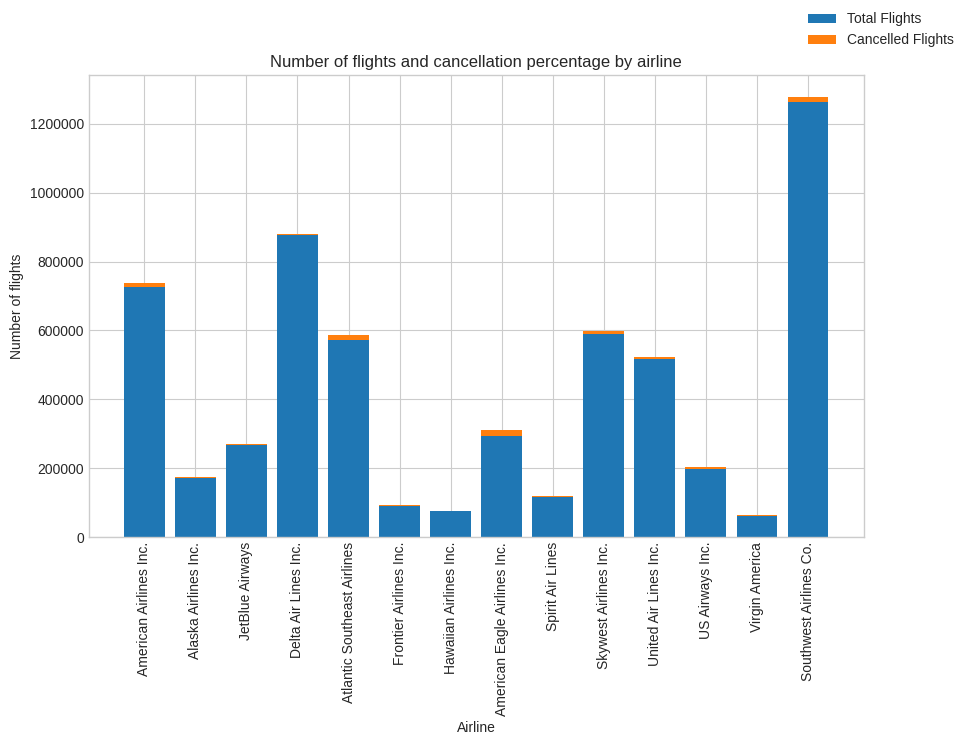

In [ ]:
# Extract the airline names, flight counts, and cancelled percentages from the DataFrame
airlines = No_Of_Flights_Cancelled['AIRLINE']
Total_Flights = No_Of_Flights_Cancelled['Total_Flights']
cancelled_flights = No_Of_Flights_Cancelled['cancelled_flights']
# Create a bar chart of the flight counts and cancelled percentages
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(airlines, Total_Flights, label='Total Flights')
ax.bar(airlines, cancelled_flights, bottom=Total_Flights, label='Cancelled Flights')
ax.set_xlabel('Airline')
ax.set_ylabel('Number of flights')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
# Rotate the x-axis tick labels to avoid overlapping
plt.xticks(rotation=90)
ax.set_title('Number of flights and cancellation percentage by airline')
fig.legend(loc='upper right')

plt.show()


In [ ]:
No_Of_Flights_Cancelled_CANCELLATION_REASON = pd.read_sql_query(
    """WITH cancelled_flights AS (
        SELECT *
        FROM flights
        WHERE CANCELLED = 1
    )

    -- Calculate the total number of cancellations for each reason code
    SELECT
        COUNT(*) AS total_cancellations,
        cf.CANCELLATION_REASON,
        cc.CANCELLATION_DESCRIPTION
    FROM cancelled_flights cf INNER JOIN cancellation_codes cc ON
    cf.CANCELLATION_REASON = cc.CANCELLATION_REASON
    GROUP BY cf.CANCELLATION_REASON, cc.CANCELLATION_DESCRIPTION
    ORDER BY cf.CANCELLATION_REASON;

""", conn)



In [ ]:
print(No_Of_Flights_Cancelled_CANCELLATION_REASON)

   total_cancellations CANCELLATION_REASON CANCELLATION_DESCRIPTION
0                25262                   A          Airline/Carrier
1                48851                   B                  Weather
2                15749                   C      National Air System
3                   22                   D                 Security


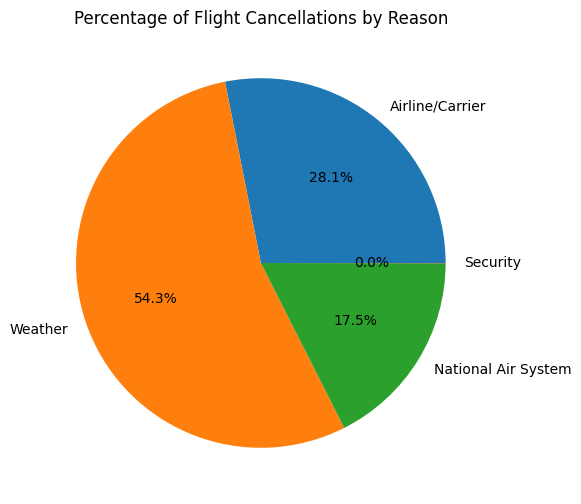

In [ ]:


# Extract the cancellation reasons and total cancellations from the DataFrame
reasons = No_Of_Flights_Cancelled_CANCELLATION_REASON['CANCELLATION_DESCRIPTION']
cancellations = No_Of_Flights_Cancelled_CANCELLATION_REASON['total_cancellations']
# Create a pie chart of the cancellation reasons
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(cancellations, labels=reasons, autopct='%1.1f%%')
ax.set_title('Percentage of Flight Cancellations by Reason')
plt.show()


In [ ]:
No_Of_Flights_Cancelled_Due_to_Airline = pd.read_sql_query(
    '''
SELECT COUNT(*) as cancelled_flights, 
al.AIRLINE, (COUNT(*) * 100.0) / (SELECT COUNT(*) FROM flights WHERE AIRLINE = f.AIRLINE) as cancelled_percentage, 
 (SELECT COUNT(*) FROM flights WHERE AIRLINE = f.AIRLINE) as Total_Flights 
 FROM flights f INNER JOIN airlines al ON f.AIRLINE = al.IATA_CODE 
 WHERE CANCELLED = 1 and CANCELLATION_REASON = 'A'
 GROUP BY f.AIRLINE, al.AIRLINE
 '''
 , conn)

In [ ]:
print(No_Of_Flights_Cancelled_Due_to_Airline)

    cancelled_flights                       AIRLINE  cancelled_percentage  \
0                2879        American Airlines Inc.              0.396565   
1                 334          Alaska Airlines Inc.              0.193600   
2                 883               JetBlue Airways              0.330652   
3                 594          Delta Air Lines Inc.              0.067817   
4                3604   Atlantic Southeast Airlines              0.630095   
5                 308        Frontier Airlines Inc.              0.339073   
6                 170        Hawaiian Airlines Inc.              0.222887   
7                2475  American Eagle Airlines Inc.              0.840031   
8                 654              Spirit Air Lines              0.557170   
9                3205         Skywest Airlines Inc.              0.544741   
10               2870         United Air Lines Inc.              0.556500   
11               1007               US Airways Inc.              0.506756   

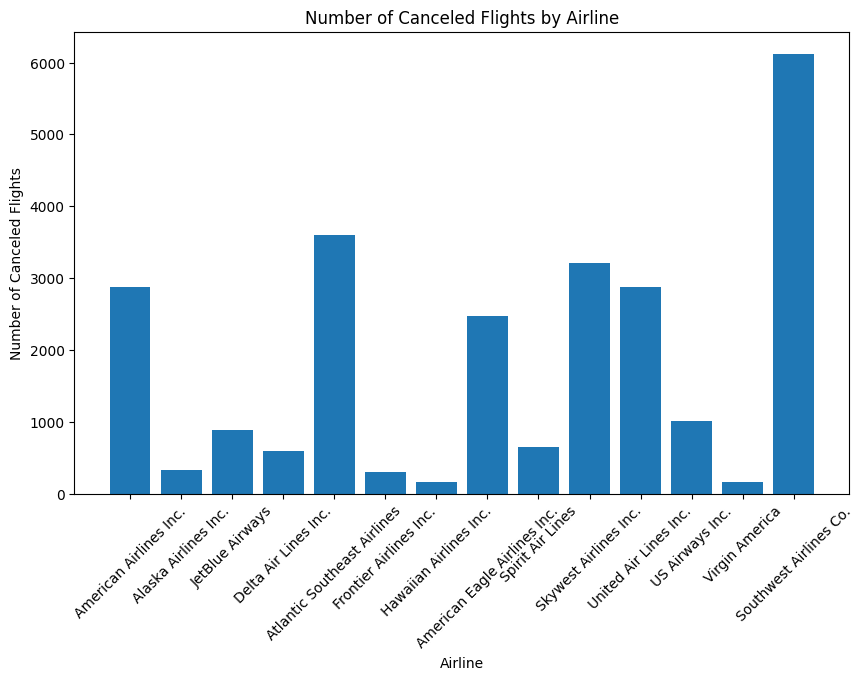

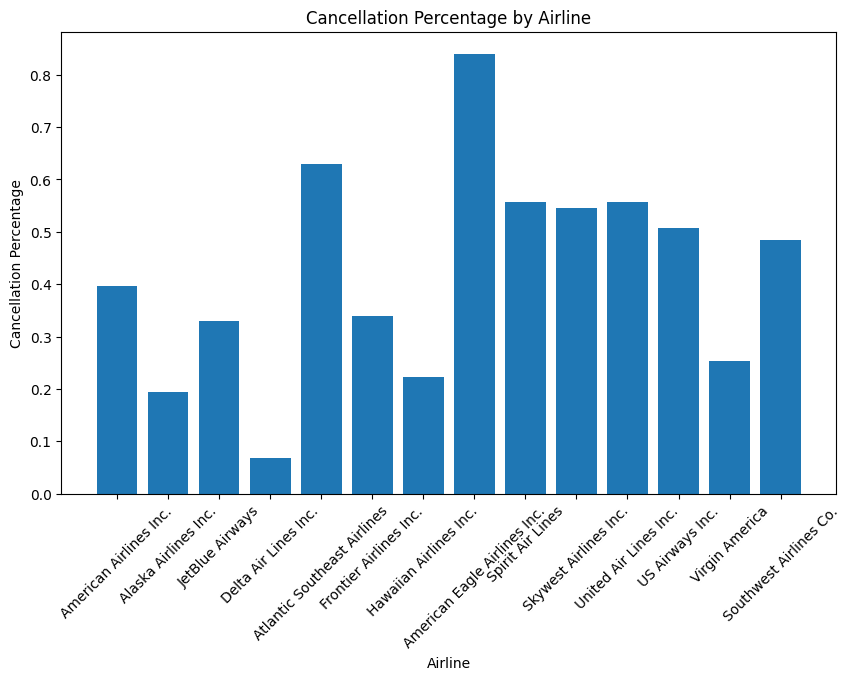

In [ ]:
import matplotlib.pyplot as plt

airlines = No_Of_Flights_Cancelled_Due_to_Airline['AIRLINE']
cancelled_flights = No_Of_Flights_Cancelled_Due_to_Airline['cancelled_flights']
cancelled_percentage = No_Of_Flights_Cancelled_Due_to_Airline['cancelled_percentage']
# Plotting the number of canceled flights
plt.figure(figsize=(10, 6))
plt.bar(airlines, cancelled_flights)
plt.xlabel('Airline')
plt.ylabel('Number of Canceled Flights')
plt.title('Number of Canceled Flights by Airline')
plt.xticks(rotation=45)
plt.show()
# Plotting the cancellation percentage
plt.figure(figsize=(10, 6))
plt.bar(airlines, cancelled_percentage)
plt.xlabel('Airline')
plt.ylabel('Cancellation Percentage')
plt.title('Cancellation Percentage by Airline')
plt.xticks(rotation=45)
plt.show()


What percentage of flights in experienced a departure delay in 2015? Among those flights, what was the average delay time, in minutes?


In [ ]:
No_DEPARTURE_DELAY_FLIGHTS = pd.read_sql_query(
    '''
SELECT COUNT(*) FROM flights WHERE DEPARTURE_DELAY = 0 OR DEPARTURE_DELAY IS NULL;

'''
, conn)

In [ ]:
print(No_DEPARTURE_DELAY_FLIGHTS)

   COUNT(*)
0    415513


In [ ]:
Per_DEPARTURE_DELAY_FLIGHTS_PER_AIRLINE = pd.read_sql_query(
    '''
SELECT COUNT(*) AS delayed_flights, al.AIRLINE, 
  (COUNT(*) * 100.0) / (SELECT COUNT(*) FROM flights WHERE AIRLINE = f.AIRLINE) AS delayed_percentage, 
  (SELECT COUNT(*) FROM flights WHERE AIRLINE = f.AIRLINE) AS total_flights 
FROM flights f 
  INNER JOIN airlines al ON f.AIRLINE = al.IATA_CODE 
WHERE DEPARTURE_DELAY > 0 
GROUP BY f.AIRLINE, al.AIRLINE;

'''
, conn)

In [ ]:
print(Per_DEPARTURE_DELAY_FLIGHTS_PER_AIRLINE)

    delayed_flights                       AIRLINE  delayed_percentage  \
0            245904        American Airlines Inc.           33.871821   
1             43566          Alaska Airlines Inc.           25.252578   
2            102061               JetBlue Airways           38.218223   
3            282463          Delta Air Lines Inc.           32.249016   
4            169897   Atlantic Southeast Airlines           29.703467   
5             34893        Frontier Airlines Inc.           38.413184   
6             20146        Hawaiian Airlines Inc.           26.413363   
7             93726  American Eagle Airlines Inc.           31.811209   
8             52089              Spirit Air Lines           44.376762   
9            171572         Skywest Airlines Inc.           29.161405   
10           256550         United Air Lines Inc.           49.745697   
11            62565               US Airways Inc.           31.484790   
12            23379                Virgin America  

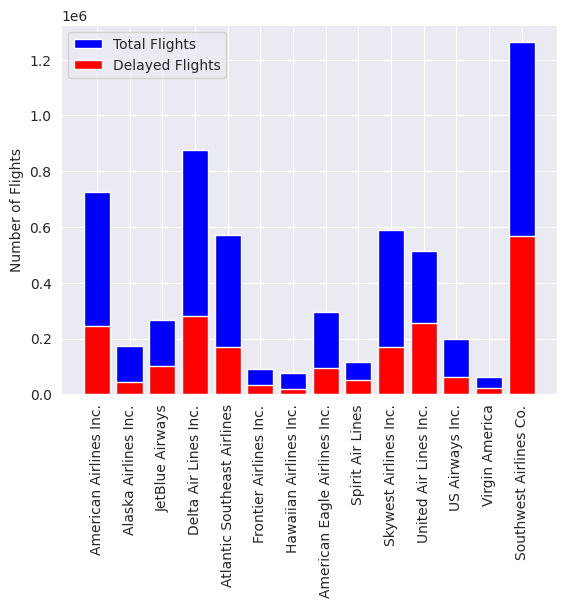

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(len(Per_DEPARTURE_DELAY_FLIGHTS_PER_AIRLINE))
total_flights = Per_DEPARTURE_DELAY_FLIGHTS_PER_AIRLINE['total_flights']
delayed_flights = Per_DEPARTURE_DELAY_FLIGHTS_PER_AIRLINE['delayed_flights']
fig, ax = plt.subplots()
ax.bar(x, total_flights, color='b', label='Total Flights')
ax.bar(x, delayed_flights, color='r', label='Delayed Flights')
ax.set_xticks(x)
ax.set_xticklabels(Per_DEPARTURE_DELAY_FLIGHTS_PER_AIRLINE['AIRLINE'], rotation=90)
ax.set_ylabel('Number of Flights')
ax.legend()
plt.show()


In [ ]:
AVG_DEPARTURE_DELAY_FLIGHTS = pd.read_sql_query(
    '''
SELECT avg(DEPARTURE_DELAY) FROM flights
'''
, conn)

In [ ]:
print(AVG_DEPARTURE_DELAY_FLIGHTS)

   avg(DEPARTURE_DELAY)
0              9.370158


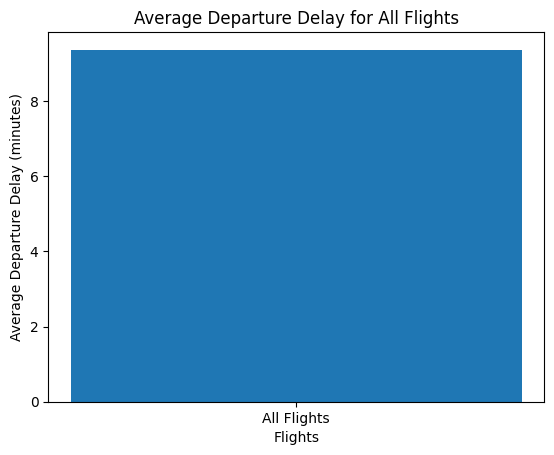

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart of the average departure delay for all flights
fig, ax = plt.subplots()
ax.bar('All Flights', AVG_DEPARTURE_DELAY_FLIGHTS.iloc[0]['avg(DEPARTURE_DELAY)'])
ax.set_xlabel('Flights')
ax.set_ylabel('Average Departure Delay (minutes)')
ax.set_title('Average Departure Delay for All Flights')
plt.show()


In [ ]:
AVG_DEPARTURE_DELAY_FLIGHTS_PER_AIRLINE = pd.read_sql_query(
    '''
WITH DEPARTURE_DELAY_FLIGHTS AS(SELECT AIRLINE, DEPARTURE_DELAY FROM flights)
SELECT al.AIRLINE, AVG(DDF.DEPARTURE_DELAY) FROM DEPARTURE_DELAY_FLIGHTS DDF 
INNER JOIN airlines al ON DDF.AIRLINE = al.IATA_CODE 
GROUP BY DDF.AIRLINE 
'''
, conn)

In [ ]:
print(AVG_DEPARTURE_DELAY_FLIGHTS_PER_AIRLINE)

                         AIRLINE  AVG(DDF.DEPARTURE_DELAY)
0         American Airlines Inc.                  8.900856
1           Alaska Airlines Inc.                  1.785801
2                JetBlue Airways                 11.514353
3           Delta Air Lines Inc.                  7.369254
4    Atlantic Southeast Airlines                  8.715934
5         Frontier Airlines Inc.                 13.350858
6         Hawaiian Airlines Inc.                  0.485713
7   American Eagle Airlines Inc.                 10.125188
8               Spirit Air Lines                 15.944766
9          Skywest Airlines Inc.                  7.801104
10         United Air Lines Inc.                 14.435441
11               US Airways Inc.                  6.141137
12                Virgin America                  9.022595
13        Southwest Airlines Co.                 10.581986


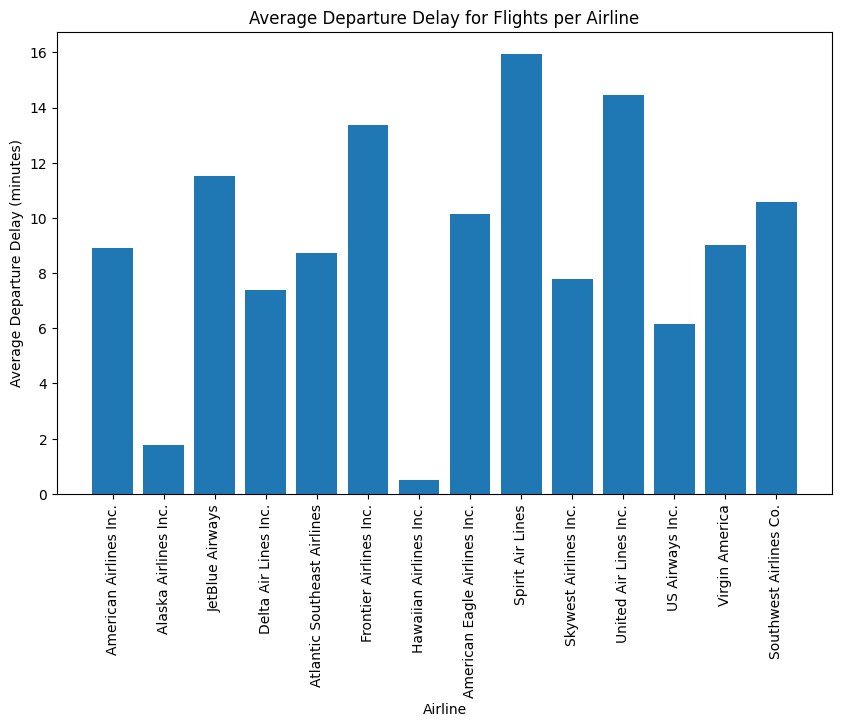

In [ ]:
import matplotlib.pyplot as plt

# Extract the airline names and average departure delay
airlines = AVG_DEPARTURE_DELAY_FLIGHTS_PER_AIRLINE['AIRLINE']
avg_delay = AVG_DEPARTURE_DELAY_FLIGHTS_PER_AIRLINE['AVG(DDF.DEPARTURE_DELAY)']

# Create a bar chart of the average departure delay per airline
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(airlines, avg_delay)
ax.set_xlabel('Airline')
ax.set_ylabel('Average Departure Delay (minutes)')
ax.set_title('Average Departure Delay for Flights per Airline')
plt.xticks(rotation=90)
plt.show()


In [ ]:
AVG_DEPARTURE_DELAY_FLIGHTS_BY_MONTH = pd.read_sql_query(
    '''
WITH DEPARTURE_DELAY_FLIGHTS AS(SELECT DEPARTURE_DELAY, MONTH FROM flights)
SELECT  AVG(DDF.DEPARTURE_DELAY) as Avg_DEPARTURE_DELAY_In_MINs, MONTH FROM DEPARTURE_DELAY_FLIGHTS DDF 
GROUP BY MONTH
'''
, conn)

In [ ]:
print(AVG_DEPARTURE_DELAY_FLIGHTS_BY_MONTH)

    Avg_DEPARTURE_DELAY_In_MINs  MONTH
0                      9.759471      1
1                     11.885284      2
2                      9.660903      3
3                      7.721885      4
4                      9.454144      5
5                     13.986016      6
6                     11.394664      7
7                      9.932045      8
8                      4.823560      9
9                      4.982661     10
10                     6.944197     11
11                    11.783529     12


In [ ]:
AVG_DEPARTURE_DELAY_FLIGHTS_BY_MONTH["MONTH"] = AVG_DEPARTURE_DELAY_FLIGHTS_BY_MONTH["MONTH"].astype(int)
AVG_DEPARTURE_DELAY_FLIGHTS_BY_MONTH["MONTH"] = AVG_DEPARTURE_DELAY_FLIGHTS_BY_MONTH["MONTH"].apply(lambda x: calendar.month_name[x])
print(AVG_DEPARTURE_DELAY_FLIGHTS_BY_MONTH)



    Avg_DEPARTURE_DELAY_In_MINs      MONTH
0                      9.759471    January
1                     11.885284   February
2                      9.660903      March
3                      7.721885      April
4                      9.454144        May
5                     13.986016       June
6                     11.394664       July
7                      9.932045     August
8                      4.823560  September
9                      4.982661    October
10                     6.944197   November
11                    11.783529   December


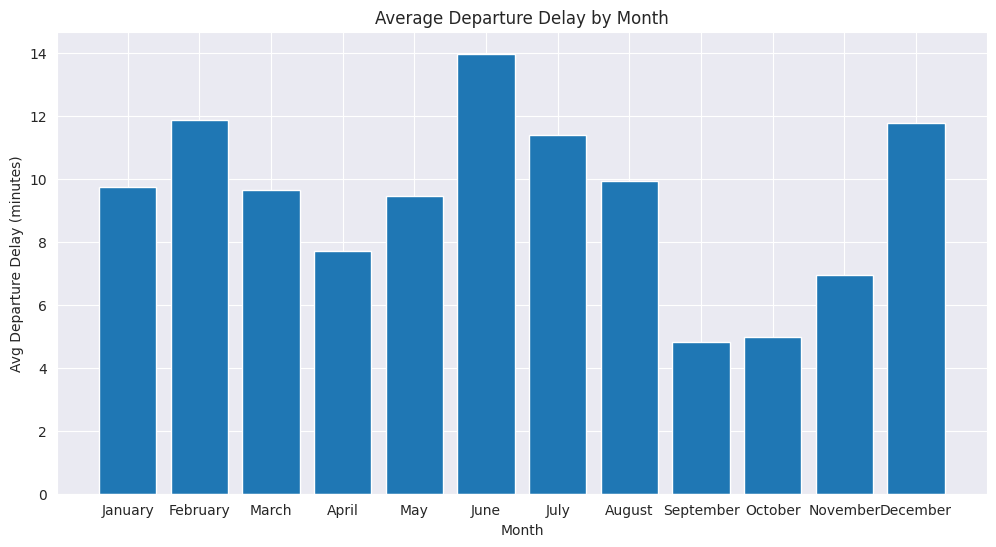

In [ ]:
import matplotlib.pyplot as plt


# setting figure size
plt.figure(figsize=(12, 6))
# plot the average departure delay by month
plt.bar(AVG_DEPARTURE_DELAY_FLIGHTS_BY_MONTH['MONTH'], AVG_DEPARTURE_DELAY_FLIGHTS_BY_MONTH['Avg_DEPARTURE_DELAY_In_MINs'])

plt.title('Average Departure Delay by Month')
plt.xlabel('Month')
plt.ylabel('Avg Departure Delay (minutes)')


plt.show()


In [ ]:
Diverted = pd.read_sql_query(
    '''
SELECT  count(*) FROM flights 
where DIVERTED = 1
'''
, conn)

In [ ]:
print(Diverted)

   count(*)
0     15187


In [ ]:
Diverted_Arrival = pd.read_sql_query(
    '''
SELECT  count(*) FROM flights 
where DIVERTED = 1 or ARRIVAL_DELAY = 1
'''
, conn)

In [ ]:
print(Diverted_Arrival)

   count(*)
0    129441


In [ ]:
Total_No_of_Delays = pd.read_sql_query(
    '''
SELECT  count(*) FROM flights 
where SECURITY_DELAY > 0 or AIR_SYSTEM_DELAY > 0 or AIRLINE_DELAY > 0 or LATE_AIRCRAFT_DELAY > 0 or WEATHER_DELAY > 0
'''
, conn)

In [ ]:
print(Total_No_of_Delays)

   count(*)
0   1063439


5,819,079-4755640 = total flights - total delayed flights

In [ ]:
Flights_with_multiple_delays = pd.read_sql_query(
    '''
SELECT 
    COUNT(*) 
FROM 
    flights 
WHERE 
     (SECURITY_DELAY > 0 AND AIR_SYSTEM_DELAY > 0)
    OR (SECURITY_DELAY > 0 AND AIRLINE_DELAY > 0)
    OR (SECURITY_DELAY > 0 AND LATE_AIRCRAFT_DELAY > 0)
    OR (SECURITY_DELAY > 0 AND WEATHER_DELAY > 0)
    OR (AIR_SYSTEM_DELAY > 0 AND AIRLINE_DELAY > 0)
    OR (AIR_SYSTEM_DELAY > 0 AND LATE_AIRCRAFT_DELAY > 0)
    OR (AIR_SYSTEM_DELAY > 0 AND WEATHER_DELAY > 0)
    OR (AIRLINE_DELAY > 0 AND LATE_AIRCRAFT_DELAY > 0)
    OR (AIRLINE_DELAY > 0 AND WEATHER_DELAY > 0)
    OR (LATE_AIRCRAFT_DELAY > 0 AND WEATHER_DELAY > 0);


'''
, conn)


In [ ]:
print(Flights_with_multiple_delays)

   COUNT(*)
0    571781


In [ ]:
Delay_Reasons_For_Flights = pd.read_sql_query(
    '''
WITH delay_cte AS (
    SELECT 
        'security_delays' AS delay_reason,
        COUNT(CASE WHEN SECURITY_DELAY > 0 THEN 1 END) AS delay_count
    FROM flights 
    WHERE SECURITY_DELAY > 0

    UNION ALL

    SELECT 
        'air_system_delays' AS delay_reason,
        COUNT(CASE WHEN AIR_SYSTEM_DELAY > 0 THEN 1 END) AS delay_count
    FROM flights 
    WHERE AIR_SYSTEM_DELAY > 0

    UNION ALL

    SELECT 
        'airline_delays' AS delay_reason,
        COUNT(CASE WHEN AIRLINE_DELAY > 0 THEN 1 END) AS delay_count
    FROM flights 
    WHERE AIRLINE_DELAY > 0

    UNION ALL

    SELECT 
        'late_aircraft_delays' AS delay_reason,
        COUNT(CASE WHEN LATE_AIRCRAFT_DELAY > 0 THEN 1 END) AS delay_count
    FROM flights 
    WHERE LATE_AIRCRAFT_DELAY > 0

    UNION ALL

    SELECT 
        'weather_delays' AS delay_reason,
        COUNT(CASE WHEN WEATHER_DELAY > 0 THEN 1 END) AS delay_count
    FROM flights 
    WHERE WEATHER_DELAY > 0
)

SELECT delay_reason, delay_count
FROM delay_cte;

'''
, conn)


In [ ]:
print(Delay_Reasons_For_Flights)

           delay_reason  delay_count
0       security_delays         3484
1     air_system_delays       564826
2        airline_delays       570022
3  late_aircraft_delays       556953
4        weather_delays        64716


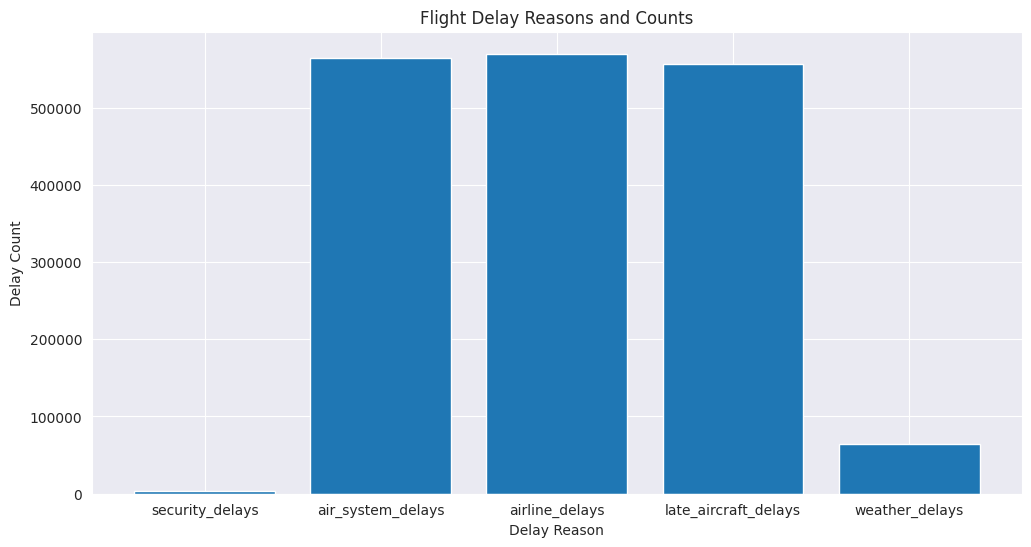

In [ ]:
# set the figure size
plt.figure(figsize=(12, 6))

delay_reasons = Delay_Reasons_For_Flights['delay_reason']
delay_counts = Delay_Reasons_For_Flights['delay_count']

plt.bar(delay_reasons, delay_counts)
plt.xlabel('Delay Reason')
plt.ylabel('Delay Count')
plt.title('Flight Delay Reasons and Counts')
plt.show()


In [ ]:
No_of_AIRLINE_Delays_By_Airline = pd.read_sql_query(
    '''
SELECT  count(*), al.Airline, (SELECT COUNT(*) FROM flights WHERE AIRLINE = f.AIRLINE) AS total_flights FROM flights f INNER JOIN airlines al ON f.AIRLINE = al.IATA_CODE 
where  AIRLINE_DELAY > 0 
group by f.AIRLINE
'''
, conn)

In [ ]:
print(No_of_AIRLINE_Delays_By_Airline)

    count(*)                       AIRLINE  total_flights
0      68656        American Airlines Inc.         725984
1       8363          Alaska Airlines Inc.         172521
2      38665               JetBlue Airways         267048
3      63128          Delta Air Lines Inc.         875881
4      53943   Atlantic Southeast Airlines         571977
5      11517        Frontier Airlines Inc.          90836
6       7395        Hawaiian Airlines Inc.          76272
7      27236  American Eagle Airlines Inc.         294632
8      17307              Spirit Air Lines         117379
9      39127         Skywest Airlines Inc.         588353
10     65999         United Air Lines Inc.         515723
11     19717               US Airways Inc.         198715
12      4445                Virgin America          61903
13    144524        Southwest Airlines Co.        1261855


To calculate the percentage of airline delays, we divide the count of airline delays by the total number of flights for each airline and then multiply by 100. Here are the percentages of airline delays for each airline:

American Airlines Inc.: 9.45%
Alaska Airlines Inc.: 4.85%
JetBlue Airways: 14.48%
Delta Air Lines Inc.: 7.21%
Atlantic Southeast Airlines: 9.43%
Frontier Airlines Inc.: 12.68%
Hawaiian Airlines Inc.: 9.67%
American Eagle Airlines Inc.: 9.24%
Spirit Air Lines: 14.74%
Skywest Airlines Inc.: 6.65%
United Air Lines Inc.: 12.80%
US Airways Inc.: 9.91%
Virgin America: 7.18%
Southwest Airlines Co.: 11.46%

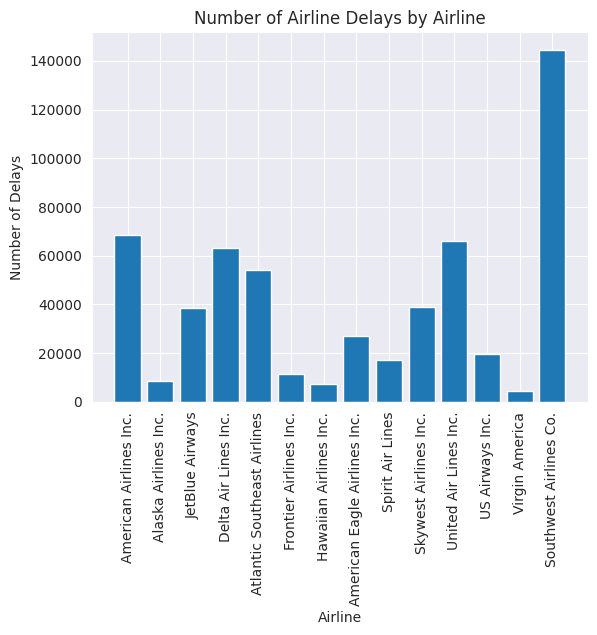

In [ ]:

# Create a bar chart of the delay count by airline
plt.bar(No_of_AIRLINE_Delays_By_Airline['AIRLINE'], No_of_AIRLINE_Delays_By_Airline['count(*)'])


plt.title('Number of Airline Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Delays')


plt.xticks(rotation=90)

# Display the chart
plt.show()


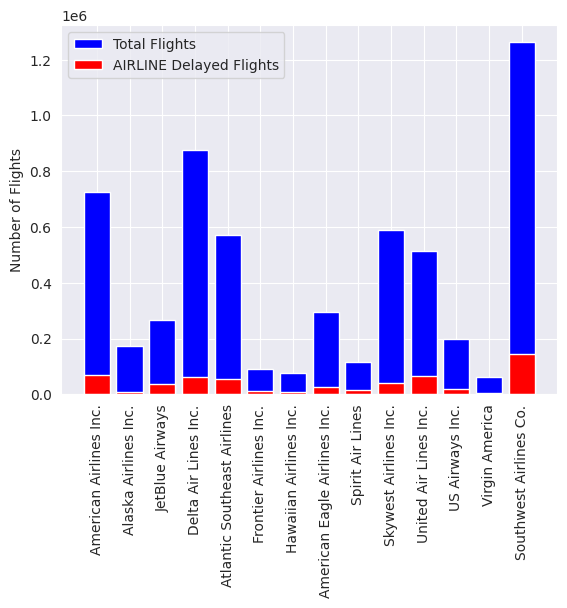

In [ ]:

x = np.arange(len(No_of_AIRLINE_Delays_By_Airline))
total_flights = No_of_AIRLINE_Delays_By_Airline['total_flights']
delayed_flights = No_of_AIRLINE_Delays_By_Airline['count(*)']

#histogram
fig, ax = plt.subplots()
ax.bar(x, total_flights, color='b', label='Total Flights')
ax.bar(x, delayed_flights, color='r', label='AIRLINE Delayed Flights')


ax.set_xticks(x)
ax.set_xticklabels(No_of_AIRLINE_Delays_By_Airline['AIRLINE'], rotation=90)
ax.set_ylabel('Number of Flights')
ax.legend()

# Show plot
plt.show()

In [ ]:
No_of_AIRLINE_Delays_By_Airport = pd.read_sql_query(
    '''
SELECT count(*), ORIGIN_AIRPORT
FROM Flights
WHERE AIRLINE_DELAY > 0
GROUP BY ORIGIN_AIRPORT
ORDER BY count(*) DESC
LIMIT 10;

'''
, conn)

In [ ]:
print(No_of_AIRLINE_Delays_By_Airport)

   count(*) ORIGIN_AIRPORT
0     35845            ORD
1     32964            ATL
2     30327            DFW
3     25340            DEN
4     22258            LAX
5     17566            IAH
6     16274            LAS
7     16143            PHX
8     15860            SFO
9     13592            EWR


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'ORD'),
  Text(1, 0, 'ATL'),
  Text(2, 0, 'DFW'),
  Text(3, 0, 'DEN'),
  Text(4, 0, 'LAX'),
  Text(5, 0, 'IAH'),
  Text(6, 0, 'LAS'),
  Text(7, 0, 'PHX'),
  Text(8, 0, 'SFO'),
  Text(9, 0, 'EWR')])

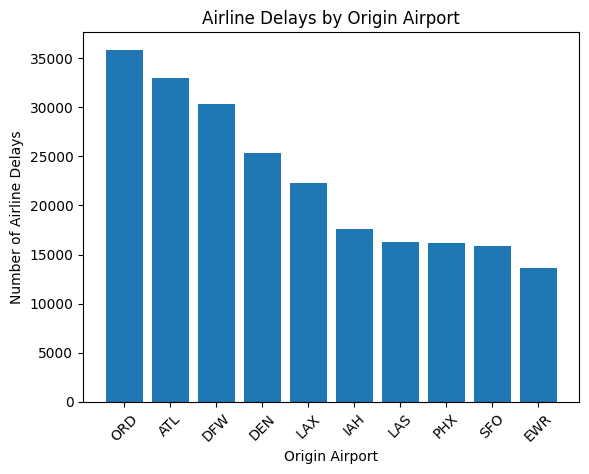

In [ ]:
import matplotlib.pyplot as plt


plt.bar(No_of_AIRLINE_Delays_By_Airport['ORIGIN_AIRPORT'], No_of_AIRLINE_Delays_By_Airport['count(*)'])
plt.xlabel('Origin Airport')
plt.ylabel('Number of Airline Delays')
plt.title('Airline Delays by Origin Airport')
plt.xticks(rotation=45) 


In [ ]:
No_Of_Flights_Cancelled_per_Airport = pd.read_sql_query(
    '''
SELECT ORIGIN_AIRPORT, COUNT(*) AS CancelledFlights
FROM flights
WHERE CANCELLED > 0
GROUP BY ORIGIN_AIRPORT
order by CancelledFlights desc
LIMIT 10;


     ''', conn)

In [ ]:
print(No_Of_Flights_Cancelled_per_Airport)

  ORIGIN_AIRPORT  CancelledFlights
0            ORD              8548
1            DFW              6254
2            LGA              4531
3            EWR              3110
4            BOS              2654
5            ATL              2557
6            LAX              2164
7            SFO              2148
8            IAH              2130
9            DEN              2123


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'ORD'),
  Text(1, 0, 'DFW'),
  Text(2, 0, 'LGA'),
  Text(3, 0, 'EWR'),
  Text(4, 0, 'BOS'),
  Text(5, 0, 'ATL'),
  Text(6, 0, 'LAX'),
  Text(7, 0, 'SFO'),
  Text(8, 0, 'IAH'),
  Text(9, 0, 'DEN')])

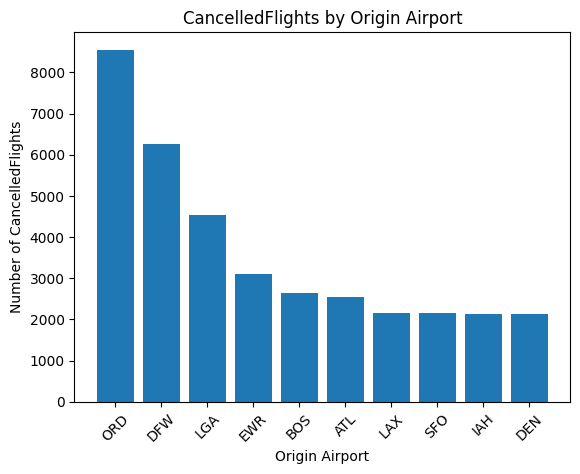

In [ ]:
import matplotlib.pyplot as plt


plt.bar(No_Of_Flights_Cancelled_per_Airport['ORIGIN_AIRPORT'], No_Of_Flights_Cancelled_per_Airport['CancelledFlights'])
plt.xlabel('Origin Airport')
plt.ylabel('Number of CancelledFlights')
plt.title('CancelledFlights by Origin Airport')
plt.xticks(rotation=45)  